# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head())
powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
display(heroes_df.describe())
powers_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Forge,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [5]:
display(heroes_df.isna().sum())
powers_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [6]:
display(heroes_df.info())
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

To deal with any null values I'll first check to see how many there are with df.isna().sum(). Depending on the type of data missing and number of missing values I will either drop rows or colums, or impute values. If there is a small number of missing values that can be resonably imputed I will do that. For continuous data I would use the mean or median depending on the variance. For categorical values, if there are clear large categories I may use those with a weighted approach, or, leave them as 'missing', because that can tell you something itself. 


In [7]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [8]:
heroes_df['Publisher'].value_counts(normalize=True)

Marvel Comics        0.539638
DC Comics            0.299026
NBC - Heroes         0.026426
Dark Horse Comics    0.025035
George Lucas         0.019471
Image Comics         0.019471
HarperCollins        0.008345
Star Trek            0.008345
Team Epic TV         0.006954
SyFy                 0.006954
Icon Comics          0.005563
Shueisha             0.005563
IDW Publishing       0.005563
ABC Studios          0.005563
Wildstorm            0.004172
Sony Pictures        0.002782
Rebellion            0.001391
J. R. R. Tolkien     0.001391
South Park           0.001391
Titan Books          0.001391
Microsoft            0.001391
Universal Studios    0.001391
Hanna-Barbera        0.001391
J. K. Rowling        0.001391
Name: Publisher, dtype: float64

In [9]:

heroes_df['Publisher'].fillna("?", inplace=True)

pub_prob = [.64, .36]
prob = [i/sum(pub_prob) for i in pub_prob]
def impute_pub(value):
    if value == "?":
        return np.random.choice(['Marvel Comics', 'DC Comics'], p=prob)
    else:
        return value
heroes_df.Publisher = heroes_df.Publisher.map(lambda x: impute_pub(x))

weight_mean = heroes_df.Weight.mean()
heroes_df['Weight'].fillna(weight_mean, inplace=True)

display(heroes_df.isna().sum(), heroes_df.info())
heroes_df['Publisher'].value_counts(normalize=True)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     734 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        734 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

None

Marvel Comics        0.540872
DC Comics            0.301090
NBC - Heroes         0.025886
Dark Horse Comics    0.024523
George Lucas         0.019074
Image Comics         0.019074
HarperCollins        0.008174
Star Trek            0.008174
Team Epic TV         0.006812
SyFy                 0.006812
Icon Comics          0.005450
Shueisha             0.005450
IDW Publishing       0.005450
ABC Studios          0.005450
Wildstorm            0.004087
Sony Pictures        0.002725
Rebellion            0.001362
J. R. R. Tolkien     0.001362
South Park           0.001362
Titan Books          0.001362
Microsoft            0.001362
Universal Studios    0.001362
Hanna-Barbera        0.001362
J. K. Rowling        0.001362
Name: Publisher, dtype: float64

In [10]:
powers_df.isna().any().any()

False

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [11]:
# heroes_df.set_index('name', inplace=True)
# powers_df.set_index('hero_names', inplace=True)

# display(heroes_df.head())
# powers_df.head()

In [12]:
# outer_join = heroes_df.join(powers_df, how='outer', rsuffix='_power')

# display(outer_join.isna().any().sum())
# outer_join.shape

In [13]:
# left_join = heroes_df.join(powers_df, how='left', rsuffix='_power')
# display(left_join.isna().any().sum())
# left_join.shape

In [14]:
# right_join = heroes_df.join(powers_df, how='right', rsuffix='_power')
# display(right_join.isna().any().sum())
# right_join.shape

In [15]:
# powers_df.rename(columns = {'hero_names':'names'}, inplace=True)

# inner_join = heroes_df.join(powers_df, how='inner', rsuffix='_power')
# display(inner_join.isna().any().sum())
# inner_join.head()

In [16]:
# drop duplicate names
heroes_df.drop_duplicates(subset='name', inplace=True)
# Reset index values
heroes_df.reset_index(drop=True, inplace=True)
heroes_df.head(2)


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


In [17]:
# change the powers_df column from 'hero_names' to 'names' so that they match
powers_df.rename(columns={'hero_names':'name'}, inplace=True)
powers_df.head(2)

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# change the values in powers_df to strings
powers_df = powers_df.astype('str')


In [19]:
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Omniscient,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

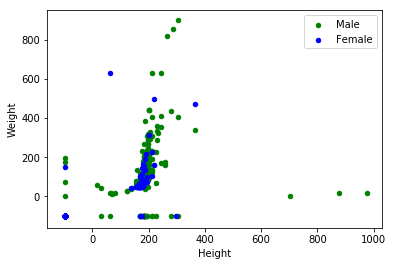

In [20]:
male_heroes = heroes_df[heroes_df['Gender'] == "Male"]
female_heroes = heroes_df[heroes_df['Gender'] == 'Female']

mh = male_heroes.plot.scatter(x='Height', y='Weight', c='green', label='Male')
female_heroes.plot.scatter(x='Height', y='Weight', c='blue', label='Female', ax=mh)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [21]:
male_heroes_df = heroes_df[heroes_df['Gender'] == "Male"]
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name], norm_hist=True)
    plt.title(f'Distribution of {gender} Heroes by {column_name}')
    plt.ylabel('Density')
    print(f'{gender} {column_name} mean is: {dataframe[column_name].mean()}')
    print(f'{gender} {column_name} median is: {dataframe[column_name].median()}')
    print(f'{gender} {column_name} std is: {dataframe[column_name].std()}')

Male Height mean is: 109.11201629327903
Male Height median is: 180.0
Male Height std is: 144.07788723467561


/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


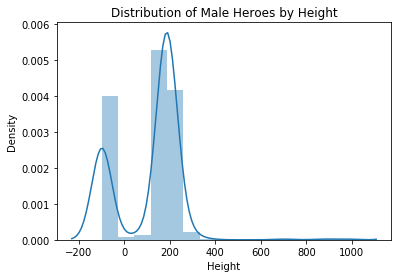

In [22]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Male Weight mean is: 53.519053342681936
Male Weight median is: 79.0
Male Weight std is: 139.7373873983421


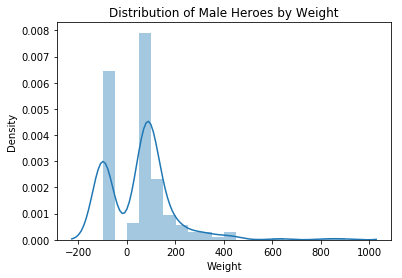

In [23]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

Female Height mean is: 97.99234693877551
Female Height median is: 168.0
Female Height std is: 125.00240486959272


/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


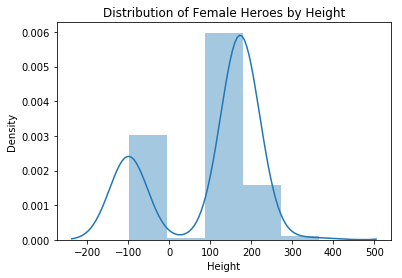

In [24]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Female Weight mean is: 27.433673469387756
Female Weight median is: 54.0
Female Weight std is: 104.24311175066705


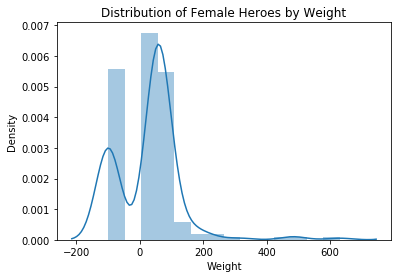

In [25]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

For each category there is a large standard deviation and the separation between the mean and median, and a notable amount of values < 0, suggesting that there are errors or significant placeholder values from missing data. Further looking into this may help create a more normal distribution. 


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [26]:
def common_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    for col in columns:
        df[col] = df[col].map({'True':1, 'False':0})
    
    power_counts = dict(df.sum())
    
    return sorted(power_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    
display(common_powers(heroes_and_powers_df))
display(common_powers(heroes_and_powers_df[heroes_and_powers_df['Publisher']=='Marvel Comics']))
common_powers(heroes_and_powers_df[heroes_and_powers_df['Publisher']=='DC Comics'])

[('Super Strength', 350),
 ('Stamina', 281),
 ('Durability', 251),
 ('Super Speed', 241),
 ('Agility', 235)]

[('Super Strength', 202),
 ('Durability', 151),
 ('Stamina', 148),
 ('Super Speed', 134),
 ('Agility', 124)]

[('Super Strength', 105),
 ('Stamina', 88),
 ('Flight', 83),
 ('Super Speed', 76),
 ('Agility', 73)]

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

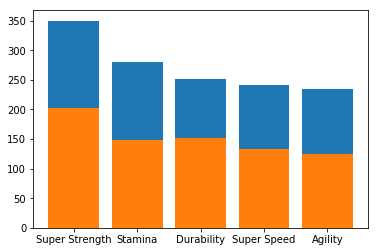

In [27]:
x, y = zip(*common_powers(heroes_and_powers_df))

display(plt.bar(x, y))

w, z = zip(*common_powers(heroes_and_powers_df[heroes_and_powers_df['Publisher']=='Marvel Comics']))

display(plt.bar(w, z))

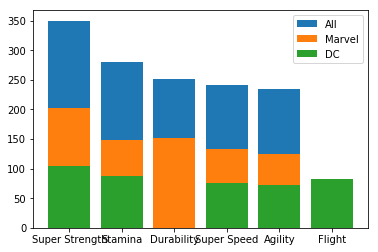

In [28]:
hp_df = heroes_and_powers_df
top5 = common_powers(hp_df)
mtop5 = common_powers(hp_df[hp_df['Publisher']=='Marvel Comics'])
dctop5 = common_powers(hp_df[hp_df['Publisher']=='DC Comics'])


top_p = list(zip(*top5))[0]
top_s = list(zip(*top5))[1]
top_mp = list(zip(*mtop5))[0]
top_ms = list(zip(*mtop5))[1]
top_dp = list(zip(*dctop5))[0]
top_ds = list(zip(*dctop5))[1]

plt.bar(top_p,top_s, label='All')
plt.bar(top_mp, top_ms, label='Marvel')
plt.bar(top_dp,top_ds, label='DC')

plt.legend()


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [29]:
# How does the data set look if we grop information by publisher and gender? 
# What is the frequency of male vs female heroes?
# Do some publishers favor male heroes more than female, and by how much? 

pub_g_grouped = hp_df.groupby(['Publisher','Gender'])
pub_g_grouped.count()

Agility  Accelerated Healing  Lantern Power Ring  \
Publisher         Gender                                                     
ABC Studios       Female        2                    2                   2   
                  Male          2                    2                   2   
DC Comics         -             1                    1                   1   
                  Female       53                   53                  53   
                  Male        139                  139                 139   
Dark Horse Comics Female        5                    5                   5   
                  Male         12                   12                  12   
George Lucas      Female        1                    1                   1   
                  Male         12                   12                  12   
Hanna-Barbera     Male          1                    1                   1   
HarperCollins     Female        1                    1                   1   
                  Male          2                    2                   2   
IDW Publishing    Male          4                    4                   4   
Icon Comics       Female        1                    1                   1   
                  Male          3                    3                   3   
Image Comics      -             1                    1                   1   
                  Female        2                    2                   2   
                  Male         11                   11                  11   
J. K. Rowling     Male          1                    1                   1   
J. R. R. Tolkien  Male          1                    1                   1   
Marvel Comics     -            15                   15                  15   
                  Female       98                   98                  98   
                  Male        228                  228                 228   
Microsoft         Male          1                    1                   1   
NBC - Heroes      Female        6                    6                   6   
                  Male         12                   12                  12   
Rebellion         Male          1                    1                   1   
Shueisha          Male          4                    4                   4   
Sony Pictures     Male          1                    1                   1   
South Park        Male          1                    1                   1   
Star Trek         Female        1                    1                   1   
                  Male          5                    5                   5   
SyFy              Female        2                    2                   2   
                  Male          3                    3                   3   
Team Epic TV      Female        1                    1                   1   
                  Male          4                    4                   4   
Titan Books       Male          1                    1                   1   
Universal Studios Male          1                    1                   1   
Wildstorm         Female        1                    1                   1   
                  Male          2                    2                   2   

                          Dimensional Awareness  Cold Resistance  Durability  \
Publisher         Gender                                                       
ABC Studios       Female                      2                2           2   
                  Male                        2                2           2   
DC Comics         -                           1                1           1   
                  Female                     53               53          53   
                  Male                      139              139         139   
Dark Horse Comics Female                      5                5           5   
                  Male                       12               12          12   
George Lucas      Female     

In [30]:
hp_df['Gender'].value_counts(normalize=True)

Male      0.702955
Female    0.270607
-         0.026439
Name: Gender, dtype: float64

In [31]:
hp_df = hp_df[hp_df.Gender != "-"]
hp_df['Gender'].value_counts(normalize=True)

Male      0.722045
Female    0.277955
Name: Gender, dtype: float64

After taking a look at the bigger picture and getting a rough idea of what the hero gender breakdown is, I noticed that ~2.6% of heores had no gender noted. In order to run this analysis I will drop those values (as its a realtively small number, but in the future would recommed more research to learn if those heroes are actually genderless, or it is actually a missing value. 

In order to see what the the gender representation is I will first count how many heroes each publisher has, and then see what percentage of those heroes are female. I'll exclude publishers with less than 10 heroes listed. 

Duplicates have already been eliminated from the dataframe, so all counts should be of individual heroes

In [32]:
pub_more_than_10 = hp_df['Publisher'].value_counts()[hp_df['Publisher'].count()]
d = dict(pub_more_than_10)
d.keys()

IndexError: index out of bounds

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data